# NLP With Hotel Review

In [131]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

# SK Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK
import nltk

In [132]:
# NLTK Packages
# Use the code below to download the NLTK package, a straightforward GUI should pop up
# nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

## Exploratory Data Analysis
First, let's load the data and understand what we are working with.

1. Perform EDA on the data and mention 3-4 observations from which you can draw actionable insights. In your EDA, you may consider creating a data dictionary, basic statistical analysis, data visualizations, data cleaning and preprocessing to prepare the data for modeling.


In [2]:
# load the data sets
df_raw = pd.read_csv('Hotel_Reviews.csv')

In [3]:
# firat look at the columns
df_raw.columns

Index(['Unnamed: 0', 'Additional_Number_of_Scoring', 'Average_Score',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
       'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')

In [4]:
# check the info for the dataframe
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

In [6]:
# first look at the negative reviews
df_raw['Negative_Review'].value_counts().head()

Negative_Review
No Negative    127890
 Nothing        14295
 Nothing         4236
 nothing         2225
 N A             1037
Name: count, dtype: int64

In [7]:
# take brief look at first 15 columns
df_raw.iloc[:5,:15]

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7


In [8]:
# take brief look at last 15 columns
df_raw.iloc[:5,15:30]

,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,2


In [9]:
# checking for missing value
df_raw.isna().sum()

Unnamed: 0                                    0
Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                

In [10]:
# checking for duplicated data
df_raw.duplicated().sum()

0

In [11]:
# a brief look at data target
df_raw['Reviewer_Score'].value_counts()

Reviewer_Score
1    293974
0    221764
Name: count, dtype: int64

In [13]:
good_percent, bad_percent = df_raw['Reviewer_Score'].value_counts() /df_raw.shape[0]

In [142]:
print(f'Good reviews: {good_percent * 100} %')
print(f'Bad reviews: {bad_percent * 100} %')

Good reviews: 57.000647615649804 %
Bad reviews: 42.99935238435019 %


#### The data target is almost balenced

In [14]:
# check for target count
print("Number of Unique Positive reviews: ",end="")
print(df_raw['Positive_Review'].value_counts().shape[0])
print("Number of Unique Negative reviews: ",end="")
print(df_raw['Negative_Review'].value_counts().shape[0])

Number of Unique Positive reviews: 412601
Number of Unique Negative reviews: 330011


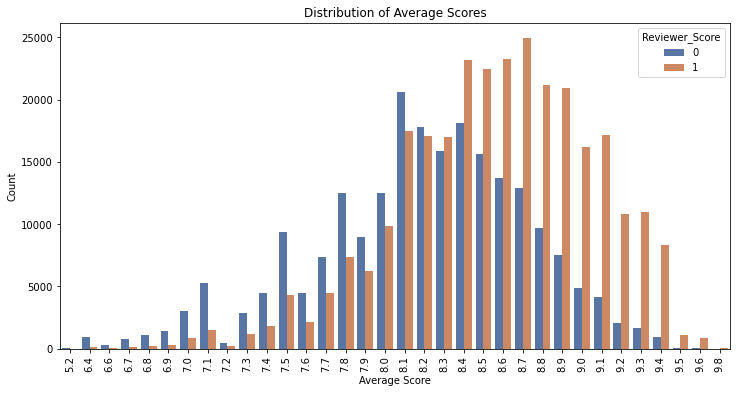

In [15]:
# Assuming df is your DataFrame and Average_Score and Reviewer_Score are the columns
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.countplot(x='Average_Score', hue='Reviewer_Score', data=df_raw, palette="deep")

plt.xlabel('Average Score')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Average Scores')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()



first make copy for cleaning as df_clean 

In [16]:
df_clean = df_raw

In This level for easier visalization, reverse the dummy data into categorical columns

In [18]:
# Extracting columns related to Reviewer_Nationality and Hotel_Address
reviewer_nationality_cols = [col for col in df_clean.columns if 'Reviewer_Nationality' in col]
hotel_address_cols = [col for col in df_clean.columns if 'Hotel_Address' in col]

# Function to get the category name
def get_category(row, columns):
    for col in columns:
        if row[col] == 1:
            return col.split('_')[-1]
    return None

# Apply the function to each row
df_clean['Reviewer_Nationality'] = df_clean.apply(lambda row: get_category(row, reviewer_nationality_cols), axis=1)
df_clean['Hotel_Address'] = df_clean.apply(lambda row: get_category(row, hotel_address_cols), axis=1)

#  drop the original dummy columns
df_clean.drop(reviewer_nationality_cols + hotel_address_cols, axis=1, inplace=True)


In [19]:
df_clean.head(3)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed,Reviewer_Nationality,Hotel_Address
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6,Other,Amsterdam
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,1,4,Ireland,Amsterdam
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,3,Australia,Amsterdam


Now we have columns with categorical columns

In [21]:
# remove the old index
# Remove the 'Unnamed: 0' column from the DataFrame
df_clean.drop('Unnamed: 0', axis=1, inplace=True)

## Data Dictionary

| Column Name                                  | Description                                               | Type       |
| -------------------------------------------- | --------------------------------------------------------- | ---------- |
| Additional_Number_of_Scoring                 | Number of scores given without an accompanying review.    | int64      |
| Average_Score                                | Average score of the hotel, calculated based on the latest comments in the last year. | float64    |
| Negative_Review                              | Text of the negative review given by the reviewer. 'No Negative' if no negative review is given. | object     |
| Review_Total_Negative_Word_Counts            | Total number of words in the negative review.             | int64      |
| Total_Number_of_Reviews                      | Total number of valid reviews the hotel has received.     | int64      |
| Positive_Review                              | Text of the positive review given by the reviewer. 'No Positive' if no positive review is given. | object     |
| Review_Total_Positive_Word_Counts            | Total number of words in the positive review.             | int64      |
| Total_Number_of_Reviews_Reviewer_Has_Given   | Number of reviews the reviewer has given in the past.     | int64      |
| Reviewer_Score                               | Score the reviewer has given to the hotel, based on his/her experience. | int64      |
| Days_Since_Review                            | Duration between the review date and scrape date.         | int64      |
| Latitude                                     | Geographical latitude of the hotel.                       | float64    |
| Longitude                                    | Geographical longitude of the hotel.                      | float64    |
| Day                                          | Day of the month when the review was posted.              | int64      |
| Month                                        | Month when the review was posted.                         | int64      |
| Year                                         | Year when the review was posted.                          | int64      |
| Leisure_Trip                                 | Indicates whether the trip was for leisure (1) or not (0).| int64      |
| Nights_Stayed                                | Number of nights the reviewer stayed in the hotel.        | int64      |
| Reviewer_Nationality                         | Nationality of the reviewer.                              | object     |
| Hotel_Address                                | Address of the hotel.                                     | object     |


In [22]:
df_clean.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,2.893479,15.680221,6.486660,2016.120761,0.810059,2.362122
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,4.667477,8.864491,3.351779,0.687567,0.392255,1.646808
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,1.000000,1.000000,2015.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,8.000000,4.000000,2016.000000,1.000000,1.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,16.000000,7.000000,2016.000000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,23.000000,9.000000,2017.000000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,31.000000,12.000000,2017.000000,1.000000,31.000000


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 

The DataFrame's data types are correctly assigned, but some columns could be optimized for computational efficiency. Adjusting these data types will enhance processing and analysis performance.

In [44]:
df_clean['Hotel_Address'].value_counts()

Hotel_Address
London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: count, dtype: int64

<AxesSubplot:xlabel='Hotel_Address'>

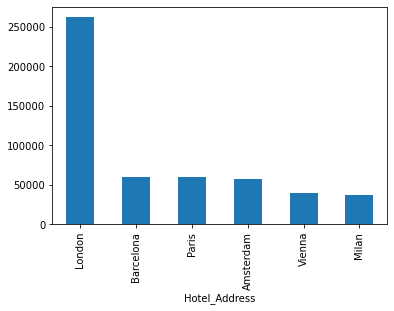

In [45]:
df_clean['Hotel_Address'].value_counts().plot(kind = 'bar')


The analysis of the Hotel_Address column reveals that the majority of hotel reviews are concentrated in London, with a count of 262,301. This is followed by Barcelona, Paris, Amsterdam, Vienna, and Milan, indicating a higher volume of reviews in these popular European cities.

In [46]:
df_clean['Reviewer_Nationality'].value_counts()

Reviewer_Nationality
UK           245246
Other        188307
USA           35437
Australia     21686
Ireland       14827
UAE           10235
Name: count, dtype: int64

<AxesSubplot:xlabel='Reviewer_Nationality'>

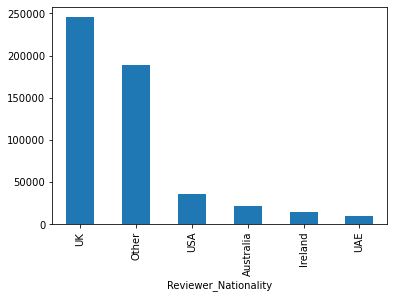

In [47]:
df_clean['Reviewer_Nationality'].value_counts().plot(kind = 'bar')

This distribution indicates a significant representation of UK reviewers in the dataset

In [48]:
df_clean['Nights_Stayed'].value_counts()

Nights_Stayed
1     193645
2     134129
3      95821
4      47817
5      20845
6       9776
7       7399
8       2502
9       1293
10       889
11       418
12       316
14       247
13       246
15       117
16        57
17        42
18        33
19        29
21        23
20        19
30        11
27        11
23        10
22        10
25         7
28         7
26         7
24         6
29         5
31         1
Name: count, dtype: int64

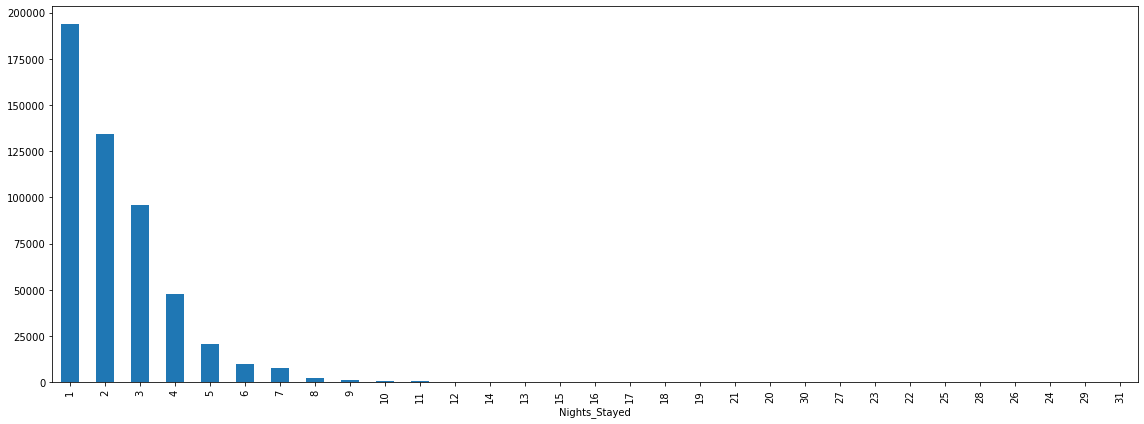

In [51]:
plt.figure(figsize=(16,6))
df_clean['Nights_Stayed'].value_counts().plot(kind = 'bar')
plt.tight_layout()


The analysis of the Nights_Stayed column indicates that most hotel stays are short, with single-night stays being the most common at 193,645 instances. Two-night and three-night stays follow with 134,129 and 95,821 instances, respectively. The frequency of stays decreases significantly as the number of nights increases, highlighting a preference for shorter hotel visits in the dataset

In [52]:
df_clean['Leisure_Trip'].value_counts()

Leisure_Trip
1    417778
0     97960
Name: count, dtype: int64

<AxesSubplot:xlabel='Leisure_Trip'>

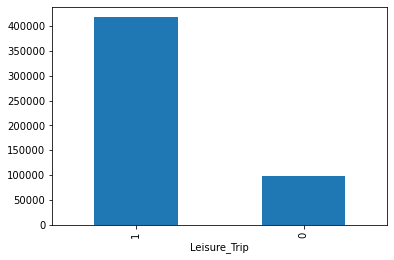

In [53]:
df_clean['Leisure_Trip'].value_counts().plot(kind = 'bar')

The data reveals that a substantial majority of hotel stays, totaling 417,778, are categorized as leisure trips. This significantly outweighs the 97,960 instances of non-leisure stays, indicating a predominant leisure-oriented clientele in the dataset

In [54]:
df_clean['Year'].value_counts()

Year
2016    264403
2017    156808
2015     94527
Name: count, dtype: int64

<AxesSubplot:xlabel='Year'>

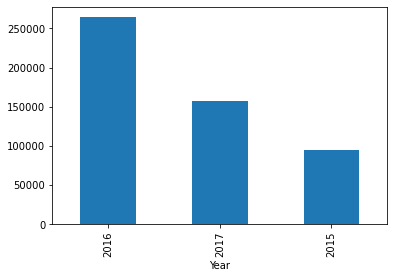

In [55]:
df_clean['Year'].value_counts().plot(kind = 'bar')

The dataset shows a year-over-year increase in the number of hotel reviews, with 2016 recording the highest count at 264,403. This is a significant rise from the 94,527 reviews in 2015, and the trend continues with 156,808 reviews in 2017, indicating growing engagement over the years.

In [56]:
df_clean['Month'].value_counts()

Month
8     50672
7     49318
5     46490
10    43843
6     42896
4     42883
9     42428
1     42151
3     41110
12    39607
2     38370
11    35970
Name: count, dtype: int64

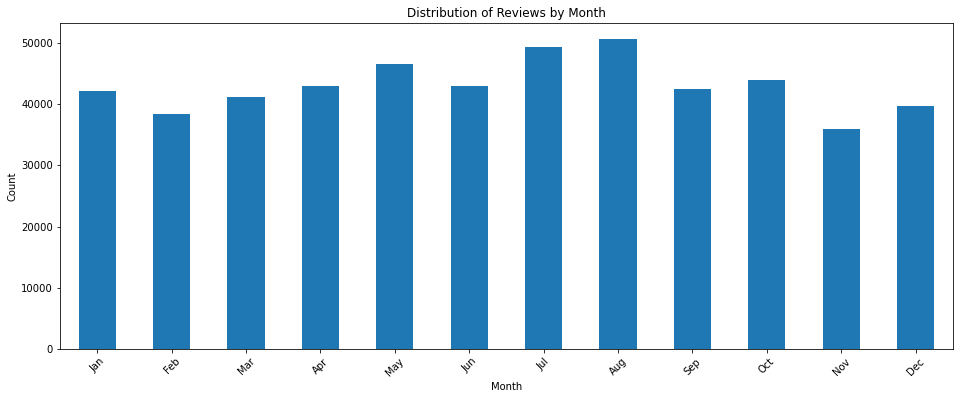

In [106]:
# Count the occurrences of each month
month_counts = df_clean['Month'].value_counts().sort_index()
plt.figure(figsize=(16,6))
# Plot
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Reviews by Month')

# Set the x-axis labels to month names for readability
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.show()


The analysis of hotel reviews by month shows the highest number of reviews in August (50,672) and July (49,318), indicating a peak in hotel stays during the summer season. The months of May and October also see high activity with over 40,000 reviews each. The least number of reviews are recorded in November (35,970) and February (38,370), suggesting a lower frequency of hotel stays during these months

In [115]:
df_clean['Days_Since_Review'].value_counts().tail(30)

Days_Since_Review
419    274
475    268
517    264
496    263
510    261
118    259
566    258
126    257
594    254
552    253
587    249
601    248
326    248
324    241
636    241
629    238
524    237
130    233
622    229
545    226
608    225
538    223
559    206
243    206
121    202
327    199
615    194
122    192
124    173
123    143
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Days_Since_Review')

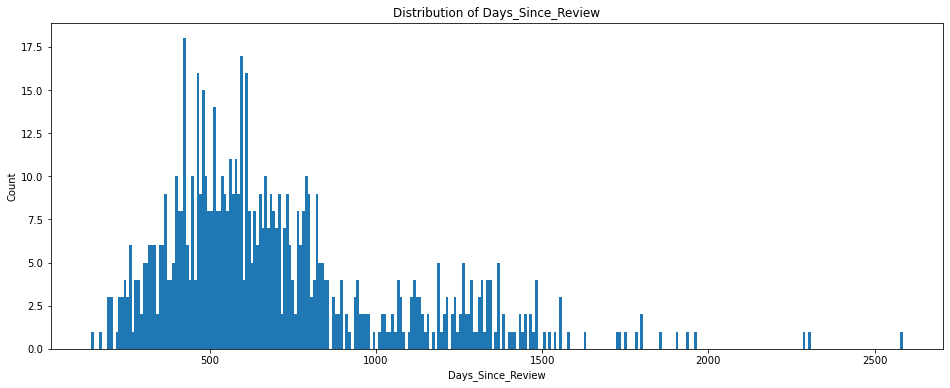

In [130]:
plt.figure(figsize=(16,6))
df_clean['Days_Since_Review'].value_counts().plot(kind = 'hist',bins=300)


plt.xlabel('Days_Since_Review')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Days_Since_Review')  # Set the title of the plot

The Days_Since_Review data shows an unusual pattern with peaks at specific intervals, like 1 day (2,585 reviews), 322 days (2,308 reviews), and 120 days (2,284 reviews), suggesting that review frequency is influenced by certain time periods. This irregular distribution, with spikes up to 611 days, indicates that external factors such as holidays or promotions might affect when reviews are posted. The pattern is atypical for review data and warrants further investigation to understand the underlying reasons

In [60]:
df_clean['Reviewer_Score'].value_counts()

Reviewer_Score
1    293974
0    221764
Name: count, dtype: int64

<AxesSubplot:xlabel='Reviewer_Score'>

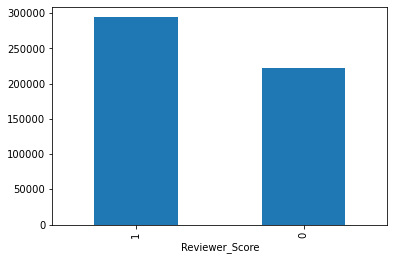

In [61]:
df_clean['Reviewer_Score'].value_counts().plot(kind = 'bar')

The dataset indicates a higher frequency of positive reviews, with 293,974 instances scored as '1' (positive sentiment), compared to 221,764 instances scored as '0' (negative sentiment). This suggests that the majority of reviewers had a favorable experience at the hotels.

In [118]:
df_clean['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts()

Total_Number_of_Reviews_Reviewer_Has_Given
1      154640
2       67077
3       46845
4       35026
5       27629
        ...  
137         1
135         1
181         1
186         1
164         1
Name: count, Length: 198, dtype: int64

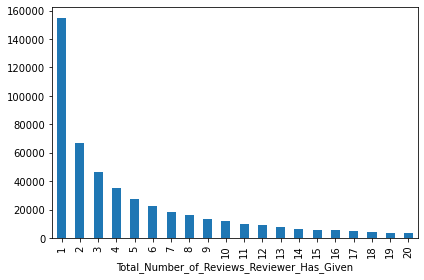

In [73]:
df_clean['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().head(20).plot(kind = 'bar')
plt.tight_layout()

The data shows a decreasing trend in the number of reviews given by individual reviewers. A large portion of reviewers (154,640) have only given one review, with the number progressively decreasing as the total number of reviews given by an individual increases. This trend suggests that most reviewers tend to contribute a single review, with a smaller, more engaged group providing multiple reviews

In [64]:
df_clean['Review_Total_Positive_Word_Counts'].value_counts()

Review_Total_Positive_Word_Counts
0      35946
6      26921
5      26844
4      24656
7      24538
       ...  
354        1
395        1
374        1
348        1
339        1
Name: count, Length: 365, dtype: int64

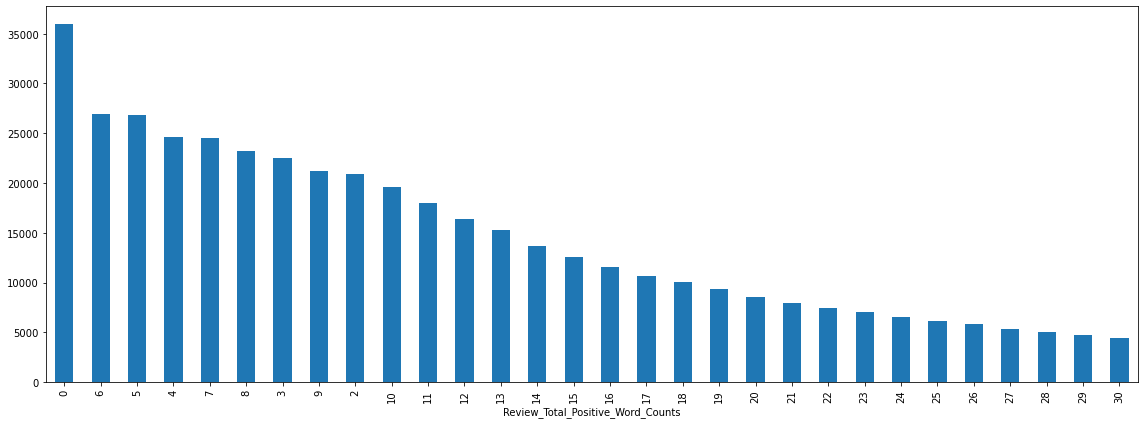

In [78]:
plt.figure(figsize=(16,6))
df_clean['Review_Total_Positive_Word_Counts'].value_counts().head(30).plot(kind = 'bar')
plt.tight_layout()

In [121]:
df_clean['Positive_Review'].value_counts()

Positive_Review
No Positive                                                                                                    35946
 Location                                                                                                       9222
 Everything                                                                                                     2284
 location                                                                                                       1677
 Nothing                                                                                                        1243
                                                                                                               ...  
 The rooms and staff were amazing                                                                                  1
 The entire package                                                                                                1
 The hotel is very clean rooms are big          

<AxesSubplot:xlabel='Positive_Review'>

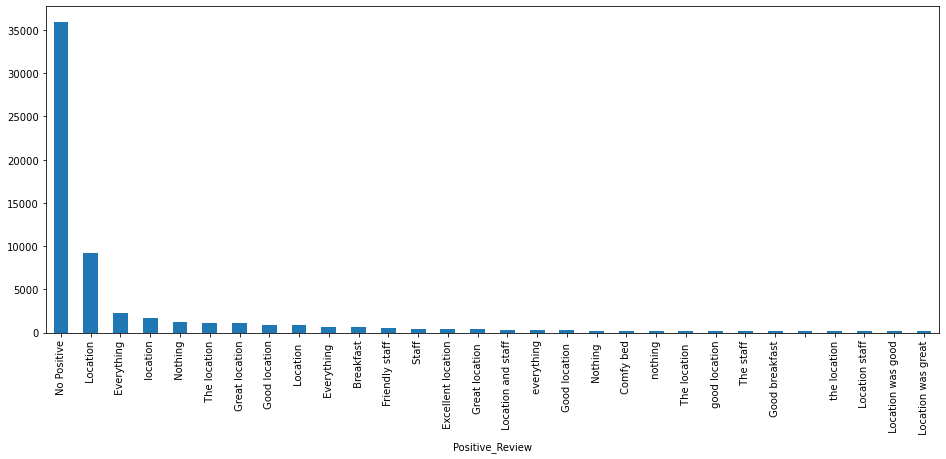

In [99]:
plt.figure(figsize=(16,6))
df_clean['Positive_Review'].value_counts().head(30).plot(kind = 'bar')

The analysis of the Positive_Review column reveals that a significant number of reviews (35,946) explicitly state 'No Positive' comment. Among those with positive comments, the most frequently mentioned aspect is 'Location', highlighted in various forms (e.g., 'Great location', 'Good location') in over 12,000 reviews. Other common positive remarks include 'Everything' (indicating overall satisfaction), specific mentions of 'Breakfast', 'Friendly staff', and 'Comfy bed'. The repetition of certain key terms like 'location', 'staff', and 'breakfast' underscores their importance in guest satisfaction.

<AxesSubplot:xlabel='Positive_Review'>

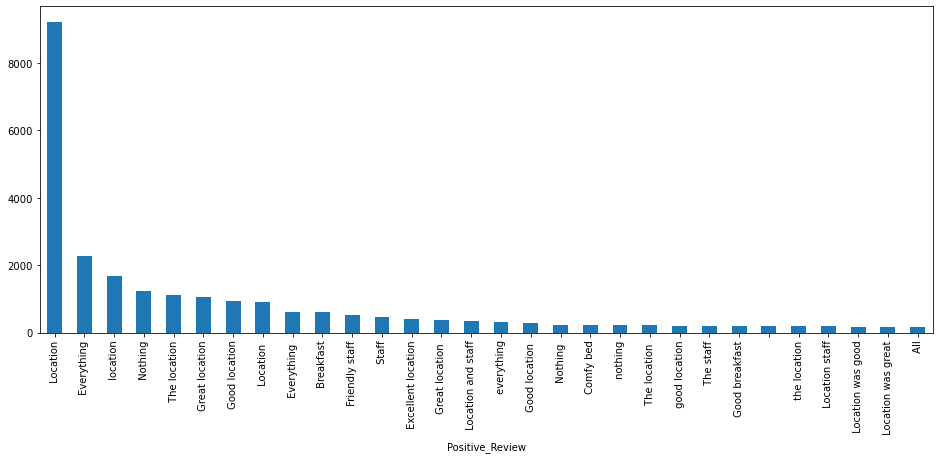

In [102]:
#remove 'No Positive' frome plot, it can be outlier
plt.figure(figsize=(16,6))
df_clean[df_clean['Positive_Review'] != 'No Positive']['Positive_Review'].value_counts().head(30).plot(kind = 'bar')

In [80]:
df_clean['Total_Number_of_Reviews'].value_counts()

Total_Number_of_Reviews
9086     4789
9568     4256
12158    4169
7105     3578
7491     3212
         ... 
45         12
207        12
66         12
131        12
110        10
Name: count, Length: 1142, dtype: int64

<AxesSubplot:xlabel='Total_Number_of_Reviews'>

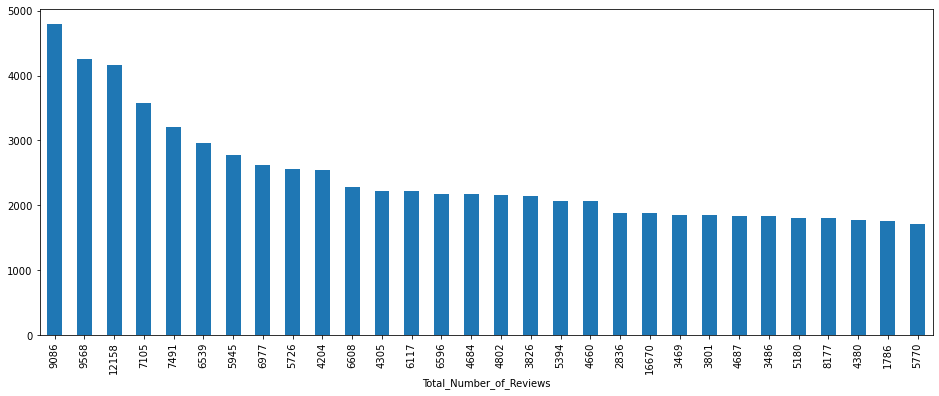

In [83]:
plt.figure(figsize=(16,6))
df_clean['Total_Number_of_Reviews'].value_counts().head(30).plot(kind = 'bar')

In [122]:
df_clean['Negative_Review'].value_counts().head(60)

Negative_Review
No Negative                    127890
 Nothing                        14295
 Nothing                         4236
 nothing                         2225
 N A                             1037
 None                             984
                                  849
 N a                              509
 Breakfast                        407
 Small room                       373
 Location                         368
 Everything                       326
 All good                         318
 Nothing really                   316
 none                             302
 nothing                          283
 No complaints                    274
 Price                            260
 Nothing really                   254
 Nil                              247
 n a                              227
 Nothing at all                   221
 Nothing to dislike               209
 Nothing at all                   194
 Small rooms                      188
 None                             

<AxesSubplot:xlabel='Negative_Review'>

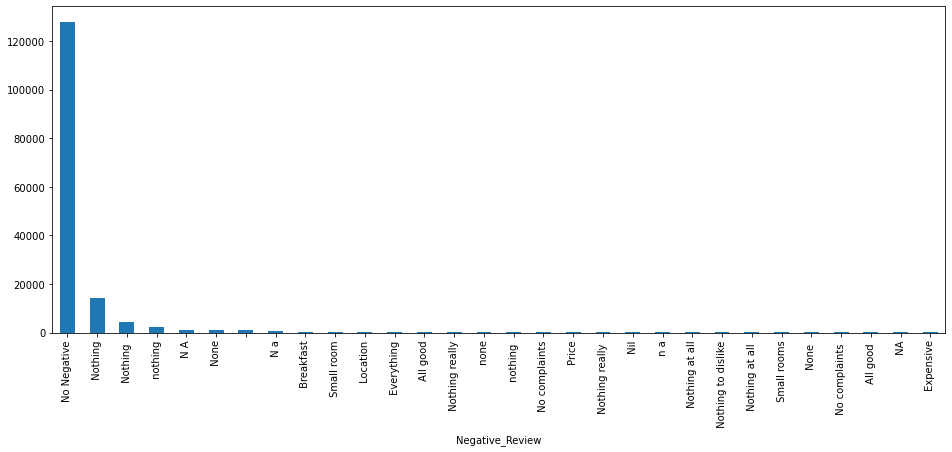

In [86]:
plt.figure(figsize=(16,6))
df_clean['Negative_Review'].value_counts().head(30).plot(kind = 'bar')

In the pre-processed dataset, the 'Negative_Review' column, labeled directly from guest comments, shows that a significant number of entries (127,890) are marked as 'No Negative', indicating an absence of negative feedback. Among the reviews with negative labels, common mentions include 'Nothing', 'Small room', 'Location', and 'Breakfast'. The high frequency of 'No Negative' or non-specific negative comments like 'Nothing' suggests that a large portion of guests did not express significant dissatisfaction. Analyzing the correlation between these negative labels and the 'Reviewer_Score' will provide insights into how much these negative aspects, or the lack thereof, influence the overall guest satisfaction and scoring behavior

In [87]:
df_clean['Average_Score'].value_counts()


Average_Score
8.4    41222
8.1    38122
8.5    38066
8.7    37798
8.6    36945
8.2    34847
8.3    32880
8.8    30836
8.9    28520
8.0    22342
9.1    21379
9.0    21051
7.8    19895
7.9    15194
7.5    13720
9.2    12935
9.3    12659
7.7    11829
9.4     9339
7.1     6780
7.6     6684
7.4     6300
7.3     3997
7.0     3899
6.9     1737
6.8     1335
9.5     1207
6.4     1163
6.7      965
9.6      915
7.2      684
6.6      400
5.2       65
9.8       28
Name: count, dtype: int64

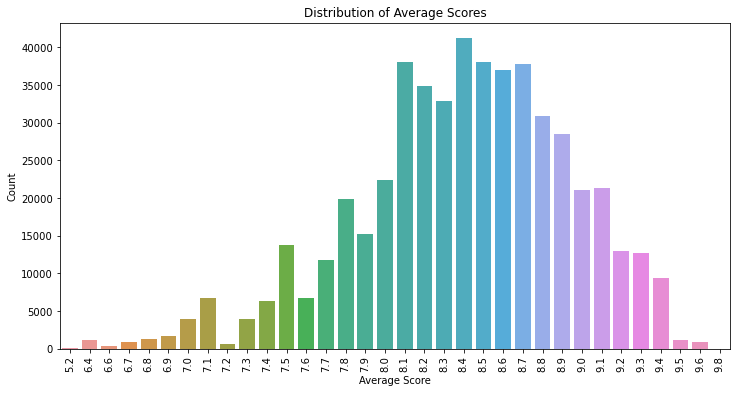

In [91]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.countplot(x='Average_Score', data=df_clean)

plt.xlabel('Average Score')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Average Scores')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()

The Average_Score data shows a concentration of scores around the 8.0 to 8.9 range, indicating a generally high level of guest satisfaction. The most frequent score is 8.4 (41,222 instances), followed closely by 8.1 and 8.5. Scores above 9.0 are less common but still significant, with 9.1 and 9.0 also appearing frequently. The lower end of the scale (below 7.0) has notably fewer instances, suggesting that very low scores are relatively rare. This distribution highlights an overall positive guest experience in the dataset

In [123]:

df_clean['Additional_Number_of_Scoring'].value_counts()

Additional_Number_of_Scoring
2682    4789
2288    4256
2623    4169
1831    3578
1936    3212
        ... 
7         56
5         39
17        24
1         13
4         12
Name: count, Length: 480, dtype: int64

<AxesSubplot:xlabel='Additional_Number_of_Scoring'>

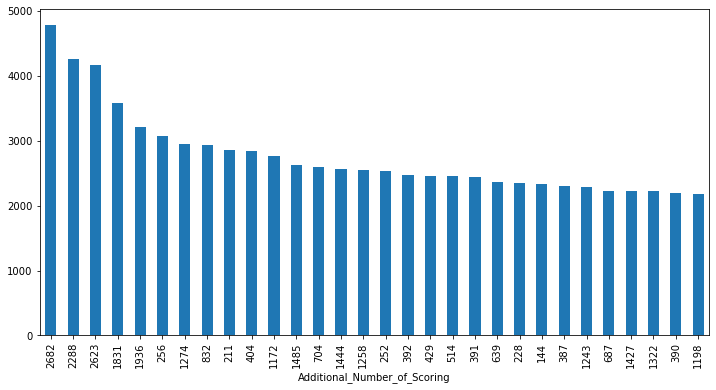

In [94]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
df_clean['Additional_Number_of_Scoring'].value_counts().head(30).plot(kind = 'bar')

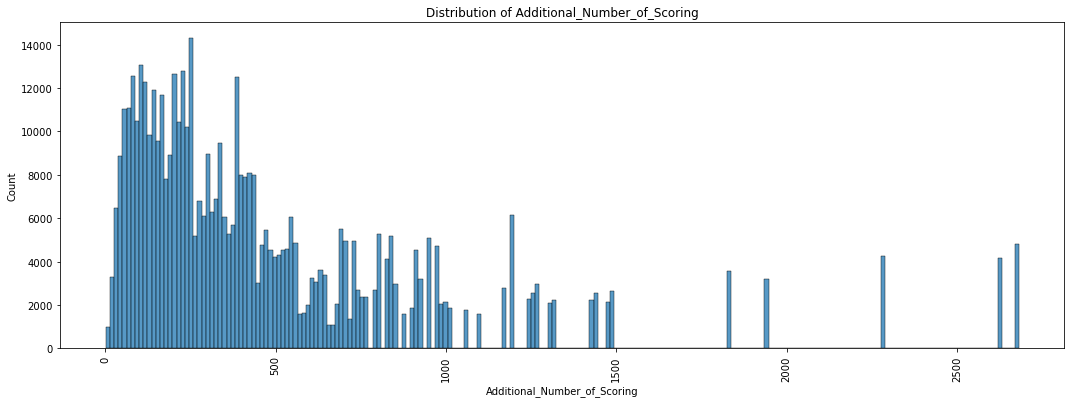

In [127]:
plt.figure(figsize=(18, 6))  # Set the size of the plot
sns.histplot(x='Additional_Number_of_Scoring', data=df_clean)

plt.xlabel('Additional_Number_of_Scoring')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Additional_Number_of_Scoring')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()

## Preprocessing
Next, the text data needs to be processed for modelling.

2. Split the data into train and test sets and transform the positive and negative review columns using a CountVectorizer. Consider the following:

What tokenizer and text cleaning steps do you include?


Using the vectorizer, maximize the number of features at 500 and make sure that tokens used <10 times are dropped from the vocabulary.

This process may be done on the positive and negative review columns separately and then the resulting arrays merged with the original numeric features to form the final train and test data frames ready for modelling. In your column names, make sure you mark which words are coming from the positive vs negative reviews 

In [133]:
df_clean.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed,Reviewer_Nationality,Hotel_Address
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6,Other,Amsterdam
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,1,4,Ireland,Amsterdam
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,3,Australia,Amsterdam
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,1,3,UK,Amsterdam
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7,2017,1,2,Other,Amsterdam


In [230]:
df_vec = df_clean.copy()

In [231]:
X = df_vec["Negative_Review"]
y = df_vec['Reviewer_Score']

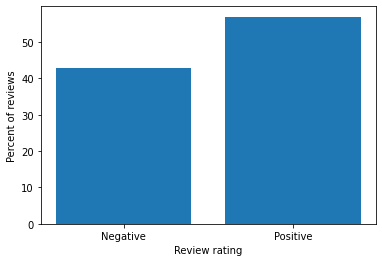

In [232]:
value_counts = dict(df_vec['Reviewer_Score'].value_counts(normalize=True)*100)
plt.figure()
plt.bar(value_counts.keys(), value_counts.values())
plt.xlabel('Review rating')
plt.ylabel('Percent of reviews')
plt.xticks([0, 1],['Negative', 'Positive'])
plt.show()

In [233]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_neg)

Now our task is to convert each review into into numeric representation using vectorization

In [235]:
# Initialise a CountVectorizer object
count_vectorizer = CountVectorizer(max_features=500,min_df=10)

# Fit the CountVectorizer object on X_train
count_vectorizer.fit(X_train)

# Transform X_train and X_test using the fitted CountVectorizer object
count_matrix_train = count_vectorizer.transform(X_train)
count_matrix_test = count_vectorizer.transform(X_test)

print('The output type is',type(count_matrix_train))

# Preview the shape of the transformed matrices
print(count_matrix_train.shape)
print(count_matrix_test.shape)

The output type is <class 'scipy.sparse.csr.csr_matrix'>
(412590, 500)
(103148, 500)


In [236]:
print(list(count_vectorizer.vocabulary_.keys())[:30])

['no', 'negative', 'nothing', 'shower', 'room', 'is', 'small', 'location', 'not', 'good', 'the', 'whole', 'thing', 'was', 'just', 'great', 'rather', 'free', 'coffee', 'in', 'business', 'however', 'dated', 'staff', 'lobby', 'were', 'very', 'nice', 'people', 'bit']


In [237]:
table=pd.DataFrame(columns=['Parameters','Feature_count'])

table.loc[table.shape[0],['Parameters','Feature_count']]=['default',count_matrix_train.shape[1]]
table

,Parameters,Feature_count
0,default,500


In [238]:
# Initialise a CountVectorizer object
count_vectorizer = CountVectorizer(stop_words="english",max_features=500,min_df=10)

# Fit the CountVectorizer object on X_train
count_vectorizer.fit(X_train)

# Transform X_train using the fitted CountVectorizer object
count_matrix_train = count_vectorizer.transform(X_train)

# Preview the shape of the transformed matrices
print(count_matrix_train.shape)

(412590, 49170)


In [239]:
table.loc[table.shape[0],['Parameters','Feature_count']]=["stop_words='english'",count_matrix_train.shape[1]]
table

,Parameters,Feature_count
0,default,500
1,stop_words='english',49170


In [240]:
#Load up our stop words
stop_words = stopwords.words('english')

#use the list as an input to <stop_words> parameter
count_vectorizer = CountVectorizer(stop_words=stop_words)

count_vectorizer.fit(X_train)

count_matrix_train = count_vectorizer.transform(X_train)
print(count_matrix_train.shape)

(412590, 49334)


In [241]:
table.loc[table.shape[0],['Parameters','Feature_count']]=["stop words from nltk library",count_matrix_train.shape[1]]
table

,Parameters,Feature_count
0,default,500
1,stop_words='english',49170
2,stop words from nltk library,49334


In [217]:
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Assuming stop_words is a predefined list of stopwords
stop_words = set(stopwords.words('english'))

def my_tokenizer(document, lemmatization=False, stemming=True):
    '''
    Function for use in Vectorizer that tokenizes the document.
    '''
    # Remove punctuation
    for punct in string.punctuation:
        document = document.replace(punct, '')

    # Tokenize - split on whitespace
    tokenized_document = document.split(' ')

    # Remove stopwords
    tokenized_document = [word for word in tokenized_document if word not in stop_words and word != '']

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    if stemming:
        tokenized_document = [stemmer.stem(word) for word in tokenized_document]

    if lemmatization:
        tokenized_document = [lemmatizer.lemmatize(word) for word in tokenized_document]

    return tokenized_document


In [ ]:
# Initialize a CountVectorizer object with the custom tokenizer
count_vectorizer = CountVectorizer(tokenizer=my_tokenizer,max_features=500,min_df=10)

# Fit the CountVectorizer object to the training data
count_vectorizer.fit(X_train)

# Transform the training data to a count matrix
count_matrix_train = count_vectorizer.transform(X_train)

# Print the shape of the count matrix
print(count_matrix_train.shape)

C:\Users\azarb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [219]:
table.loc[table.shape[0],['Parameters','Normalization','Feature_count']]=["stop words from nltk library","Stemming",count_matrix_train.shape[1]]
table

,Parameters,Feature_count,Normalization
0,default,49477,NaN
1,stop_words='english',49170,NaN
2,stop words from nltk library,49334,NaN
3,stop words from nltk library,35635,Stemming


In [220]:
# sum all the rows for each feature
word_counts = pd.DataFrame(
        {"counts": np.array(count_matrix_train.sum(axis=0)).flatten()},
        index=count_vectorizer.get_feature_names_out()).sort_values("counts", ascending=False)

print('The most common words and their counts are:')
word_counts[:20]

The most common words and their counts are:


,counts
room,168768
neg,103747
hotel,64388
breakfast,47393
small,39919
staff,31951
noth,30987
bed,30502
would,25841
could,25712


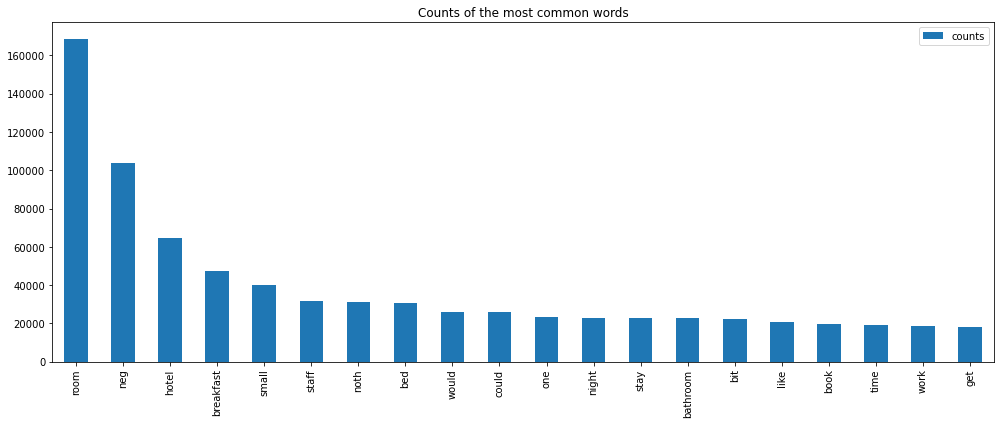

In [224]:

word_counts[:20].plot(kind='bar',title='Counts of the most common words',figsize=(14,6))
plt.tight_layout()

Using max_df and min_df parameters in CountVectorizer can effectively reduce the number of features and help mitigate problems like overfitting and the curse of dimensionality

In [ ]:
# Initialise a CountVectorizer object
count_vectorizer = CountVectorizer(tokenizer=my_tokenizer, max_features=500,min_df=10)

# Fit the CountVectorizer object on X_train
count_vectorizer.fit(X_train)

# Fit the CountVectorizer object on X_train
count_matrix_train = count_vectorizer.transform(X_train)

print(count_matrix_train.shape);

In [226]:
# Adjust these values based on your dataset and requirements
max_df_value = 0.50  # Example: terms appearing in more than 50% of documents will be ignored
min_df_value = 10     # Example: terms appearing in fewer than 10 documents will be ignored

count_vectorizer = CountVectorizer(tokenizer=my_tokenizer,max_df=max_df_value, min_df=min_df_value)
count_vectorizer.fit(X_train)

count_matrix_train = count_vectorizer.transform(X_train)
count_matrix_test = count_vectorizer.transform(X_test)

print('Shape of count_matrix_train:', count_matrix_train.shape)
print('Shape of count_matrix_test:', count_matrix_test.shape)


C:\Users\azarb\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of count_matrix_train: (412590, 9586)
Shape of count_matrix_test: (103148, 9586)


In [229]:
table.loc[table.shape[0],['Parameters','Normalization','min_df','Feature_count']]=["stop words from nltk library","Stemming","1% of documents",count_matrix_train.shape[1]]


In [228]:
table

,Parameters,Feature_count,Normalization,min_df
0,default,49477,NaN,NaN
1,stop_words='english',49170,NaN,NaN
2,stop words from nltk library,49334,NaN,NaN
3,stop words from nltk library,35635,Stemming,NaN
4,stop words from nltk library,9586,Stemming,0.5% of documents


In [ ]:
X_pos = df_vec["Positive_Review"]
y_pos = df_vec['Reviewer_Score']

In [ ]:
X = X_pos
y = y_pos

In [ ]:
# Initialize a CountVectorizer object with default settings
count_vectorizer_default = CountVectorizer()
count_vectorizer_default.fit(X_train)
count_matrix_train_default = count_vectorizer_default.transform(X_train)
count_matrix_test_default = count_vectorizer_default.transform(X_test)

# Output type and shape of the transformed matrices
print('The output type is', type(count_matrix_train_default))
print('Shape of count_matrix_train (default):', count_matrix_train_default.shape)
print('Shape of count_matrix_test (default):', count_matrix_test_default.shape)

# Initialize DataFrame to store feature counts
table = pd.DataFrame(columns=['Parameters', 'Feature_count'])
table.loc[table.shape[0]] = ['default', count_matrix_train_default.shape[1]]

# Initialize CountVectorizer with English stop words
count_vectorizer_stopwords = CountVectorizer(stop_words="english")
count_vectorizer_stopwords.fit(X_train)
count_matrix_train_stopwords = count_vectorizer_stopwords.transform(X_train)

# Shape of the transformed matrix
print('Shape of count_matrix_train (stop_words="english"):', count_matrix_train_stopwords.shape)
table.loc[table.shape[0]] = ["stop_words='english'", count_matrix_train_stopwords.shape[1]]

# Load custom stop words from NLTK
nltk_stop_words = stopwords.words('english')

# Initialize CountVectorizer with NLTK stop words
count_vectorizer_nltk = CountVectorizer(stop_words=nltk_stop_words)
count_vectorizer_nltk.fit(X_train)
count_matrix_train_nltk = count_vectorizer_nltk.transform(X_train)

# Shape of the transformed matrix
print('Shape of count_matrix_train (NLTK stop words):', count_matrix_train_nltk.shape)
table.loc[table.shape[0]] = ["stop words from nltk library", count_matrix_train_nltk.shape[1]]

# Display the table
print(table)


2. Text Data Analysis
Since you have text data (Negative_Review, Positive_Review), you might want to explore:

Word Count Analysis: Look at the most common words in the reviews. This can be done using a word cloud or frequency distribution.
Sentiment Analysis: You could analyze the sentiment of the reviews. This might be particularly interesting to compare against the Reviewer_Score.
3. Data Distribution and Trends
Score Distributions: Plot histograms or boxplots for Average_Score and Reviewer_Score to understand their distribution.
Time Series Analysis: Since you have Day, Month, and Year, you can look at trends over time. Are scores improving or declining? Are there seasonal patterns?
4. Correlation Analysis
Investigate correlations between numerical variables, especially between scores and word counts, using a correlation matrix and heatmap.
5. Categorical Data Analysis
For Reviewer_Nationality and Hotel_Address, you can explore which nationalities are most common and which hotels (or locations) are reviewed most frequently.
Leisure_Trip: Analyze the proportion of leisure trips versus other types of trips.
6. Geographical Analysis
With Latitude and Longitude, you could create geographical plots to see where the hotels are located and if location correlates with scores.
7. Review Length Analysis
Analyze the relationship between review length (Review_Total_Negative_Word_Counts and Review_Total_Positive_Word_Counts) and scores.

In [154]:
df_raw.head(1)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6


In [155]:
df_clean.head(1)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6


In [ ]:
df_eda 

In [ ]:
df_feat

In [ ]:
df_train